## An example workout for Pilar et al.

In [1]:
import matplotlib.pyplot as plt
import dpaleo
import numpy as np

### Objective: estimate mean net slip rate for the whole fault

We have net slip rate at two sites as follows: 

+ Arnold: 0.5 ± 0.16 mm/yr 
+ Ryland: 0.2 ± 0.13 mm/yr 

Below is a prelimiary analysis using a bell-shaped model. I notice that the esimated slip rates as on the plot below does not correspond to the above.

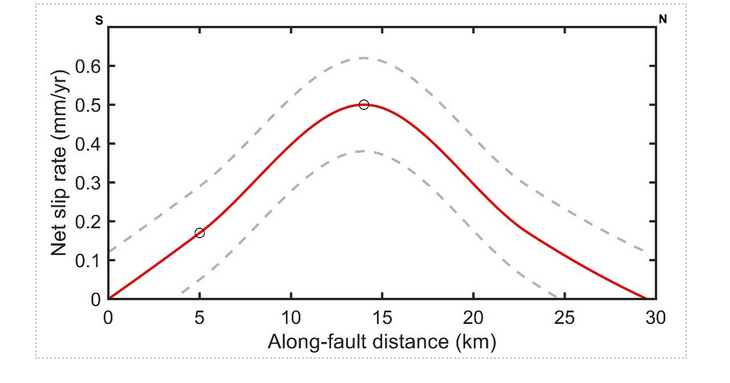


With only two data points, there is not much to do. However, we still carry out the assessment considering multiple models:

+ (1) A Symmetric bellshape function (raised cosine)
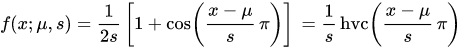

https://en.wikipedia.org/wiki/Raised_cosine_distribution

+ (2) Symmetric triangular shape

Manighetti, I., Campillo, M., Sammis, C., Mai, P.M. and King, G., 2005. Evidence for self‐similar, triangular slip distributions on earthquakes: Implications for earthquake and fault mechanics. Journal of Geophysical Research: Solid Earth, 110(B5).

+ (3) sincesqrt (or rainbow) function 

Biasi GP, Weldon RJ, II. 2006. Estimating surface rupture length and magnitude of paleoearthquakes from point measurements of rupture displacement. Bulletin of the Seismological Society of America. 96(5):1612–1623. doi:10.1785/0120040172.

Thingbaijam KKS, Van Dissen RJ, Shaw BE, Gerstenberger MC. 2022. Average coseismic slip profiles. Lower Hutt (NZ): GNS Science. 33 p. (GNS Science report; 2021/24). doi:10.21420/S6ED-JN06.

+ Boxcar (or uniform function) 

In [2]:
# raisecosine
def raisecosine(X, mean, sigma):
    Y = []
    for x in X:
        y = 1/(2*sigma)*(1+np.cos(np.pi*(x-mean)/sigma))
        Y.append(y)
    return Y

In [3]:
# Gausian discared
## y-axis as the gaussian
# y_data = stats.norm.pdf(x_data, 15, 7.3)
# y_data = [y*9.2 for y in y_data]
## plot data
# plt.plot(x_data, y_data, 'o')

In [4]:
# data points 
xdata = [5.0, 14.0]
ydata = [0.2, 0.5]
ydataerr = [0.13, 0.16]

fitting scale paramter of sinesqrt = 0.313


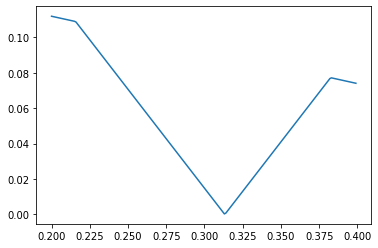

In [5]:
# fit a sinesqrt function
# slip_profile(avg_surfslip, x_by_RL=np.linspace(0.05, 0.5,50), model='sinesqrt'):

norm_x = [x/30.0 for x in xdata] 
# grid search
pscand = list(np.arange(0.2, 0.4, 0.001))

fitE = []
for ps in pscand: 
    pred_y = [ps*dpaleo.sinesqrt(nx) for nx in norm_x]
    res = [abs(oy-py) for oy,py in zip(ydata, pred_y)]
    fitE.append(np.std(res))
plt.plot(pscand, fitE, '-')
print('fitting scale paramter of sinesqrt = %.3f' %pscand[fitE.index(min(fitE))])

0.03333333333333332 0.03333333333333333
1.0333333333333334 -0.03333333333333334


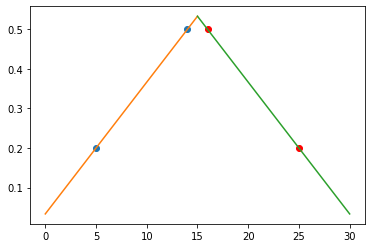

In [6]:
# get a traigular shape

b1, a1 = np.polyfit(xdata, ydata, 1)
xdata2 = [30-x for x in xdata]
b2, a2 = np.polyfit(xdata2, ydata, 1)

x1 = [0, 5, 10, 15]
y1 = [a1+b1*x for x in x1]

x2 = [15, 20, 25, 30]
y2 = [a2+ b2*x for x in x2]

plt.plot(xdata,ydata, 'o')
plt.plot(xdata2,ydata, 'ro')
plt.plot(x1, y1, '-')
plt.plot(x2, y2, '-');
print(a1, b1)
print(a2, b2)


In [7]:
# fit raised cosine
# This is fixed at mean 15 and sigma 15

In [8]:
def traingular(x):
    a = [0.033, 1.033]
    b = [0.033, -0.033]
    if x<15:
        y = a[0]+b[0]*x
    else:
        y = a[1]+b[1]*x 
    
    return y

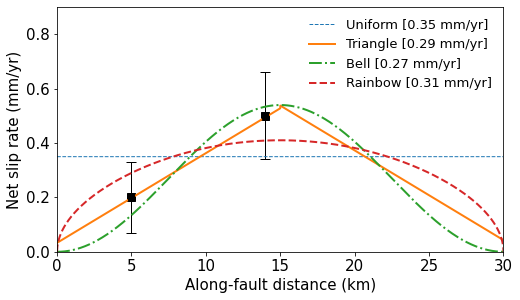

In [21]:
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,4.5))

xx = np.linspace(0.0,1,3000)
xxx = [x*30 for x in xx]

ax.errorbar(xdata,ydata, yerr=ydataerr, fmt='s',color = 'k', lw=1, capsize=5)
ax.plot(xdata,ydata, 's', color = 'k', markersize=8)

# unfirm,
y_unif = [np.mean(ydata)]*len(xxx)
ax.plot(xxx, y_unif, '--', linewidth = 1, label='Uniform [%.2f mm/yr]' %np.mean(y_unif))

# traingle
y_triang = [traingular(x) for x in xxx]
ax.plot(xxx, y_triang, '-', linewidth = 2, label='Triangle [%.2f mm/yr]' %np.mean(y_triang))

# bellshape - raisecosine
y_rcos = raisecosine(xxx, 15, 15)
y_rcos = [x*8.1 for x in y_rcos]
## x-axis for the plot
x_data = np.arange(0, 30, 0.01)
ax.plot(xxx, y_rcos, '-.',linewidth = 2, label='Bell [%.2f mm/yr]' %np.mean(y_rcos))

# rainbow shape - sinesqrt
scalep_sinesqrt = 0.32
y_sinesqrt = dpaleo.slip_profile(0.313, x_by_RL=xx)
ax.plot(xxx,y_sinesqrt, '--', linewidth = 2, label='Rainbow [%.2f mm/yr]' %np.mean(y_sinesqrt))
#dx = (xxx[0]-xxx[1])


ax.set_xlim([0, 30])
ax.set_ylim([0, 0.9]) 

ax.legend(loc = 'upper right', frameon=False, fontsize=13)
ax.set_ylabel('Net slip rate (mm/yr)')
ax.set_xlabel('Along-fault distance (km)');

In [11]:
#Mean net slip rate for the whole fault:

print("Uniform slip rate: %.3f mm/yr" %np.mean(y_unif))
print("Triangular-shaped slip rate: %.3f mm/yr" %np.mean(y_triang))
print("Bell-shaped slip rate: %.3f mm/yr" %np.mean(y_rcos))
print("Rainbow-shaped slip rate: %.3f mm/yr" %np.mean(y_sinesqrt))


Uniform slip rate: 0.350 mm/yr
Triangular-shaped slip rate: 0.285 mm/yr
Bell-shaped slip rate: 0.270 mm/yr
Rainbow-shaped slip rate: 0.313 mm/yr
